In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from rdkit import Chem
from rdkit.Chem import Descriptors

from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [12]:
def get_dataset(data_set_path): 
    # return pd.read_csv(f'../../dataset/processed_data/{data_set}.csv')  
    return pd.read_csv(data_set_path, sep=',')

def finger_print_similarity(dataset):
    parent_smiles = dataset['parent_smiles'].tolist()
    metabolite_smiles = dataset['child_smiles'].tolist()

    parent_mol = [Chem.MolFromSmiles(x) for x in parent_smiles]
    metabolite_mol = [Chem.MolFromSmiles(x) for x in metabolite_smiles]

    parent_fps = [Chem.RDKFingerprint(x) for x in parent_mol]
    metabolite_fps = [Chem.RDKFingerprint(x) for x in metabolite_mol]

    # parent_fps = [AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=1024) for x in parent_mol]
    # metabolite_fps = [AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=1024) for x in metabolite_mol]

    fingerprint_similarities = []
    for i in range(len(parent_smiles)):
        
        s = DataStructs.TanimotoSimilarity(parent_fps[i],metabolite_fps[i]) 
        fingerprint_similarities.append(s)

    return fingerprint_similarities  

def molecular_weight_analysis(dataset): 
    parent_weights = []
    metabolite_weights = []

    parents = dataset["parent_smiles"]
    metabolites = dataset["child_smiles"]
    for parent, metabolite in zip(parents, metabolites): 
        parent_mol_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(parent))
        metabolite_mol_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(metabolite))
        # diff_mol_weight = abs(parent_mol_weight - metabolite_mol_weight)

        # mol_weights.append([metabolite_mol_weight, diff_mol_weight])
    # metab_weights, diff_weights = list(zip(*mol_weights))
    
    # unique_parents = get_unique_parent_dataset(dataset)["parent_smiles"]
    # parent_weights = [Descriptors.ExactMolWt(Chem.MolFromSmiles(parent)) for parent in unique_parents]
   
    # create_pychart_double_hist(parent_weights, "Parents", metab_weights, "Metabolites", 30, "molecular_weights")
    # create_pychart_hist(diff_weights, 16, "molecular_weights_diff")

    return parent_weights, metabolite_weights



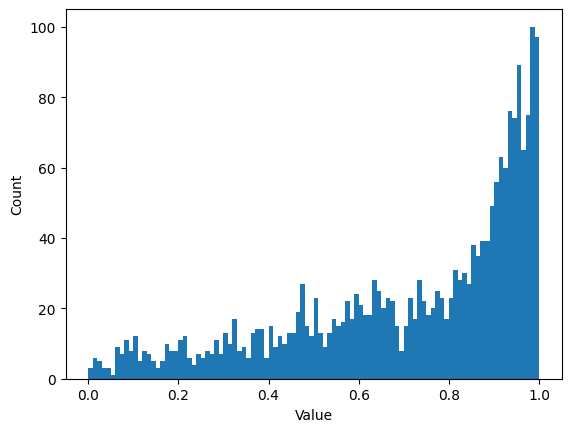

In [9]:
metxbiodb = get_dataset("/projects/cc/se_users/larsson_kbvs588/test/MasterThesis/dataset/dummy_data/smiles_metxbiodb.csv")
metxbiodb_similarities = finger_print_similarity(metxbiodb)

plt.hist(metxbiodb_similarities, bins=100)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()